# Samir Mascarenhas | MODELAGEM DE SCORE DE CRÉDITO |
### **Contexto dos dados**
A base de número 1 conta com a lista de clientes que realizaram pelo menos uma operação de crédito nos últimos 24 meses em certa instituição financeira. Nela, você encontrará o indexador de cada cliente, bem como suas
características e comportamentos. O objetivo de sua utilização é a criação de um modelo que estime a probabilidade de inadimplência de cada um destes clientes, baseando-se no seu comportamento histórico.

A base de número 2 contém a lista de clientes que tomaram crédito no mês seguinte à implementação do modelo
criado. Esta será utilizada para acompanhar o desempenho do modelo.

### **Objetivo** 
Criação de um modelo que estime a probabilidade
de inadimplência de cada um destes clientes, baseando-se no seu comportamento histórico

### **Questões**

QUESTÃO 1: DIAGNÓSTICO DE VARIÁVEIS E PREDEFINIÇÕES DE MODELAGEM
1. Quais as variáveis seriam escolhidas como features para o modelo? Por quê?
2. Quais os procedimentos de tratamento e preparação de features você recomendaria serem realizados?
3. Qual a relação entre a capacidade de discriminação do modelo e a proporção de inadimplentes na base
de dados utilizada para treinar o modelo?
4. Existem outliers na base? Você acredita ser pertinente eliminar estas amostras para fins de modelagem?

QUESTÃO 2: TREINAMENTO DO MODELO
1. A partir do método de regressão logística, treine e valide o modelo.
2. O diretor da instituição financeira não está interessado em saber exatamente qual cliente ficará ou não
inadimplente, mas sim a sua probabilidade de inadimplência. Sabendo disto, calcule e interprete as métricas
de Kolmogorov-Smirnov (KS) e AUROC. Você utilizaria alguma outra métrica para medir a capacidade de
discriminação do modelo? Qual e por quê?
3. Quais testes você realizaria para evitar overfitting/underfitting?
4. Quais as variáveis mais importantes/relevantes no modelo final? Qual o seu impacto na probabilidade de
inadimplência de cada um dos clientes?

QUESTÃO 3: IMPLEMENTAÇÃO E ACOMPANHAMENTO DO MODELO
1. Calcule o índice de estabilidade populacional (IEP/PSI), considerando os novos clientes da instituição
financeira. A população de clientes que tomou crédito no mês seguinte é estável em relação à população
utilizada para o treino do modelo? Por quê? O IEP é o único método possível para verificarmos a qualidade
de um modelo em operação?
2. Quais medidas devem ser tomadas no caso da desestabilização de um modelo?

# 0.0 IMPORTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
plt.style.use('ggplot')

## 0.2 Loading data

In [2]:
base_1 = pd.read_csv('../1.csv', delimiter=';')
base_2 = pd.read_csv('../2.csv', delimiter=';')
dict_raw = pd.read_csv('../dict.csv', delimiter=';')


## 0.3 Split Dataset

In [3]:
train_data, test_data = train_test_split(base_1, test_size=0.2, random_state=42, stratify=base_1['target'])

Evitando data leakage e utilizando stratify para garantir que a proporção de classes (0 e 1) seja a mesma em ambos os conjuntos de dados.

# 1.0. DESCRIÇÃO DOS DADOS

## 1.1. Data dimensions

In [4]:
print( 'Number of Rows:{}'.format( train_data.shape[0] ) )
print( 'Number of Cols:{}'.format( train_data.shape[1] ) )

Number of Rows:7000
Number of Cols:36


## 1.2. Data Types

In [5]:
train_data.dtypes

var_0      int64
var_1      int64
var_2      int64
var_3      int64
var_4      int64
var_5     object
var_6     object
var_7     object
var_8     object
var_9      int64
var_10     int64
var_11     int64
var_12     int64
var_13     int64
var_14     int64
var_15     int64
var_16    object
var_17    object
var_18     int64
var_19     int64
var_20     int64
var_21     int64
var_22     int64
var_23     int64
var_24     int64
var_25     int64
var_26     int64
var_27     int64
var_28     int64
var_29     int64
var_30     int64
var_31     int64
var_32     int64
var_33     int64
target     int64
index      int64
dtype: object

## 1.3. Check NA

In [6]:
train_data.isna().sum()

var_0     0
var_1     0
var_2     0
var_3     0
var_4     0
var_5     0
var_6     0
var_7     0
var_8     0
var_9     0
var_10    0
var_11    0
var_12    0
var_13    0
var_14    0
var_15    0
var_16    0
var_17    0
var_18    0
var_19    0
var_20    0
var_21    0
var_22    0
var_23    0
var_24    0
var_25    0
var_26    0
var_27    0
var_28    0
var_29    0
var_30    0
var_31    0
var_32    0
var_33    0
target    0
index     0
dtype: int64

## 1.4. Change Types

In [7]:
columns_to_convert = ['var_5','var_6', 'var_7', 'var_8', 'var_16', 'var_17']

In [8]:
colunas_para_converter = ['var_5', 'var_6', 'var_7', 'var_8', 'var_16', 'var_17']
for col in colunas_para_converter:
    train_data[col] = train_data[col].map(lambda x: float(x.replace(',', '.')))
    test_data[col] = test_data[col].map(lambda x: float(x.replace(',', '.')))

In [9]:
# Verificando se a conversão deu certo
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 2419 to 2926
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var_0   7000 non-null   int64  
 1   var_1   7000 non-null   int64  
 2   var_2   7000 non-null   int64  
 3   var_3   7000 non-null   int64  
 4   var_4   7000 non-null   int64  
 5   var_5   7000 non-null   float64
 6   var_6   7000 non-null   float64
 7   var_7   7000 non-null   float64
 8   var_8   7000 non-null   float64
 9   var_9   7000 non-null   int64  
 10  var_10  7000 non-null   int64  
 11  var_11  7000 non-null   int64  
 12  var_12  7000 non-null   int64  
 13  var_13  7000 non-null   int64  
 14  var_14  7000 non-null   int64  
 15  var_15  7000 non-null   int64  
 16  var_16  7000 non-null   float64
 17  var_17  7000 non-null   float64
 18  var_18  7000 non-null   int64  
 19  var_19  7000 non-null   int64  
 20  var_20  7000 non-null   int64  
 21  var_21  7000 non-null   int64  
 22  va

## 1.5. Check Duplicates Cod Clients

In [10]:
train_data['index'].nunique()

7000

## 1.6. Verificando se existem linhas zeradas

In [11]:
df_boolean_mask = train_data == 0
df_boolean_mask.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,target,index
2419,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,False
3536,False,False,False,False,True,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,False
985,False,False,False,False,True,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,False
8361,False,False,False,False,True,False,False,True,True,True,...,True,True,True,True,True,True,True,True,False,False
4013,False,False,False,False,True,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,False


In [12]:
linhas_zeradas = df_boolean_mask.iloc[:,:-2].all(axis=1)
sum( linhas_zeradas )

0

## 1.7 Verificando Valores nas features

In [13]:
train_data.nunique().sort_values()

var_4        2
target       2
var_27       3
var_28       4
var_29       4
var_23       5
var_22       7
var_24       8
var_3        9
var_30      12
var_9       13
var_25      13
var_12      14
var_10      14
var_18      15
var_14      15
var_31      16
var_26      17
var_32      21
var_20      25
var_21      28
var_33      30
var_19      55
var_11      81
var_13     185
var_16     382
var_17     502
var_0      614
var_6     1465
var_2     4391
var_15    4590
var_7     4910
var_1     5174
var_8     5183
var_5     6399
index     7000
dtype: int64

In [14]:
train_data.var_28.value_counts(1)

var_28
0    0.996714
1    0.002714
2    0.000429
3    0.000143
Name: proportion, dtype: float64

Baixa variabilidade: Com 99.7% dos valores sendo 0, a variável oferece pouca informação discriminativa para a maioria dos casos.

Potencial ruído: Os poucos casos não-zero podem ser outliers ou erros de dados, não representando um padrão real.

Simplificação do modelo: Remover variáveis com baixa variabilidade pode simplificar o modelo sem grande perda de performance.

In [15]:
# Lista de variáveis com muitos valores 0
variables = train_data.columns

# Calculando a porcentagem de zeros
percentage_zeros = train_data[variables].apply(lambda x: (x == 0).mean() * 100)

# Criando o DataFrame
percentage_zeros_df = percentage_zeros.reset_index()
percentage_zeros_df.columns = ['features', 'porcentagem_zeros']

percentage_zeros_df.sort_values('porcentagem_zeros', ascending=False)

,features,porcentagem_zeros
27,var_27,99.771429
28,var_28,99.671429
29,var_29,99.614286
30,var_30,98.785714
23,var_23,98.742857
22,var_22,98.314286
31,var_31,98.028571
24,var_24,97.371429
25,var_25,95.828571
20,var_20,95.200000


## 1.8. Removendo Variaveis acima de 97% dos valores com 0

In [16]:
variaveis_para_remover = ['index', 'var_27', 'var_28', 'var_29', 'var_30', 'var_23', 'var_22', 'var_31', 'var_24']
train_data = train_data.drop(columns=variaveis_para_remover)
test_data = test_data.drop(columns=variaveis_para_remover)

## 1.9. Descriptive Statistical

In [17]:
num_attributes = train_data.select_dtypes( include=['int64', 'float64'])

In [18]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max )  ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
metrics = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
metrics.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
metrics

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,var_0,115600.0,9.700500e+06,9.584900e+06,5.015819e+06,4761003.000,1.656437e+06,0.593627,1.903344
1,var_1,41.0,3.442900e+04,3.438800e+04,5.037264e+03,3872.000,4.199539e+03,1.375522,2.669772
2,var_2,0.0,1.680900e+04,1.680900e+04,3.129158e+03,2372.000,2.749627e+03,1.267108,1.474752
3,var_3,4.0,3.800000e+01,3.400000e+01,1.391986e+01,8.000,1.192770e+01,1.292592,-0.016884
4,var_4,0.0,1.000000e+00,1.000000e+00,4.835714e-01,0.000,4.997300e-01,0.065764,-1.996246
5,var_5,0.0,1.997434e+06,1.997434e+06,1.657927e+05,56465.405,2.913335e+05,3.325909,12.648321
6,var_6,50.0,7.002900e+06,7.002850e+06,1.276864e+03,50.000,8.447519e+04,81.507281,6744.989312
7,var_7,0.0,3.313762e+05,3.313762e+05,1.453047e+03,65.385,1.001609e+04,17.567478,420.874444
8,var_8,0.0,2.838045e+05,2.838045e+05,1.474536e+03,74.135,9.003799e+03,16.158696,370.148587
9,var_9,0.0,1.500000e+01,1.500000e+01,1.562857e-01,0.000,6.241593e-01,10.188850,172.604735


Quando você tem muitas variáveis numéricas com skew (ou assimetria) positiva relativamente alta, isso significa que a distribuição dessas variáveis está inclinada para a esquerda, com a cauda mais longa estendendo-se para a direita como mostrei na imagem abaixo.

Variáveis com alta assimetria podem afetar a performance de muitos modelos de machine learning, especialmente os que assumem que os dados são aproximadamente normalmente distribuídos

**Assimetria:** Um valor de assimetria entre -1 e 1 é geralmente considerado aceitável. Valores entre -0.5 e 0.5 indicam uma distribuição aproximadamente simétrica.

**Curtose:** Valores de curtose entre -1 e 1 também são considerados aceitáveis, mas isso pode variar dependendo do contexto específico da análise.

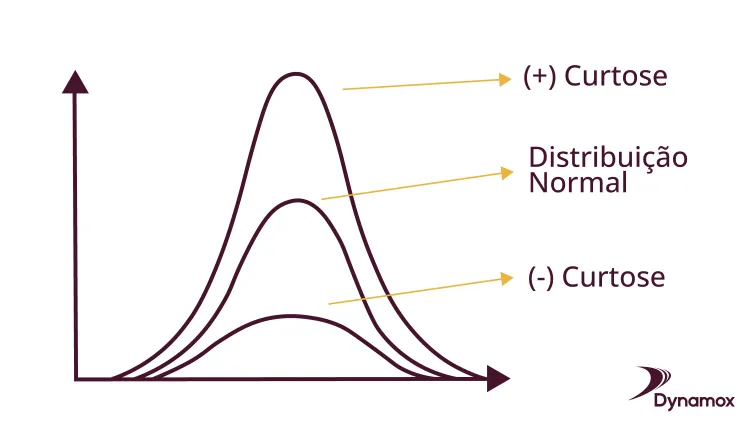

In [19]:
from IPython.display import Image
Image('../img/curtose.png')

# 2.0. ANÁLISE EXPLORATÓRIA DOS DADOS ( EDA )

## 2.1. Análise Univariada

### 2.1.1 Response Variable

In [20]:
train_data['target'].value_counts(1)
# 10% de inadimplencia

target
0    0.9
1    0.1
Name: proportion, dtype: float64

Text(0, 0.5, 'Porcentagem')

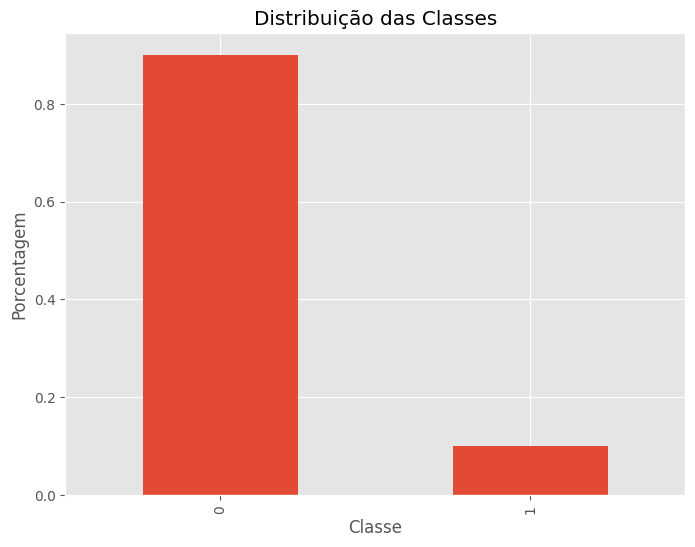

In [21]:
# Contar a frequência das classes e calcular a proporção
class_counts = train_data['target'].value_counts(1)

# Plotar a distribuição das classes
class_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Distribuição das Classes')
plt.xlabel('Classe')
plt.ylabel('Porcentagem')

### 2.1.2. Variáveis Numéricas

array([[<Axes: title={'center': 'var_0'}>,
        <Axes: title={'center': 'var_1'}>,
        <Axes: title={'center': 'var_2'}>,
        <Axes: title={'center': 'var_3'}>,
        <Axes: title={'center': 'var_4'}>],
       [<Axes: title={'center': 'var_5'}>,
        <Axes: title={'center': 'var_6'}>,
        <Axes: title={'center': 'var_7'}>,
        <Axes: title={'center': 'var_8'}>,
        <Axes: title={'center': 'var_9'}>],
       [<Axes: title={'center': 'var_10'}>,
        <Axes: title={'center': 'var_11'}>,
        <Axes: title={'center': 'var_12'}>,
        <Axes: title={'center': 'var_13'}>,
        <Axes: title={'center': 'var_14'}>],
       [<Axes: title={'center': 'var_15'}>,
        <Axes: title={'center': 'var_16'}>,
        <Axes: title={'center': 'var_17'}>,
        <Axes: title={'center': 'var_18'}>,
        <Axes: title={'center': 'var_19'}>],
       [<Axes: title={'center': 'var_20'}>,
        <Axes: title={'center': 'var_21'}>,
        <Axes: title={'center': 'var_2

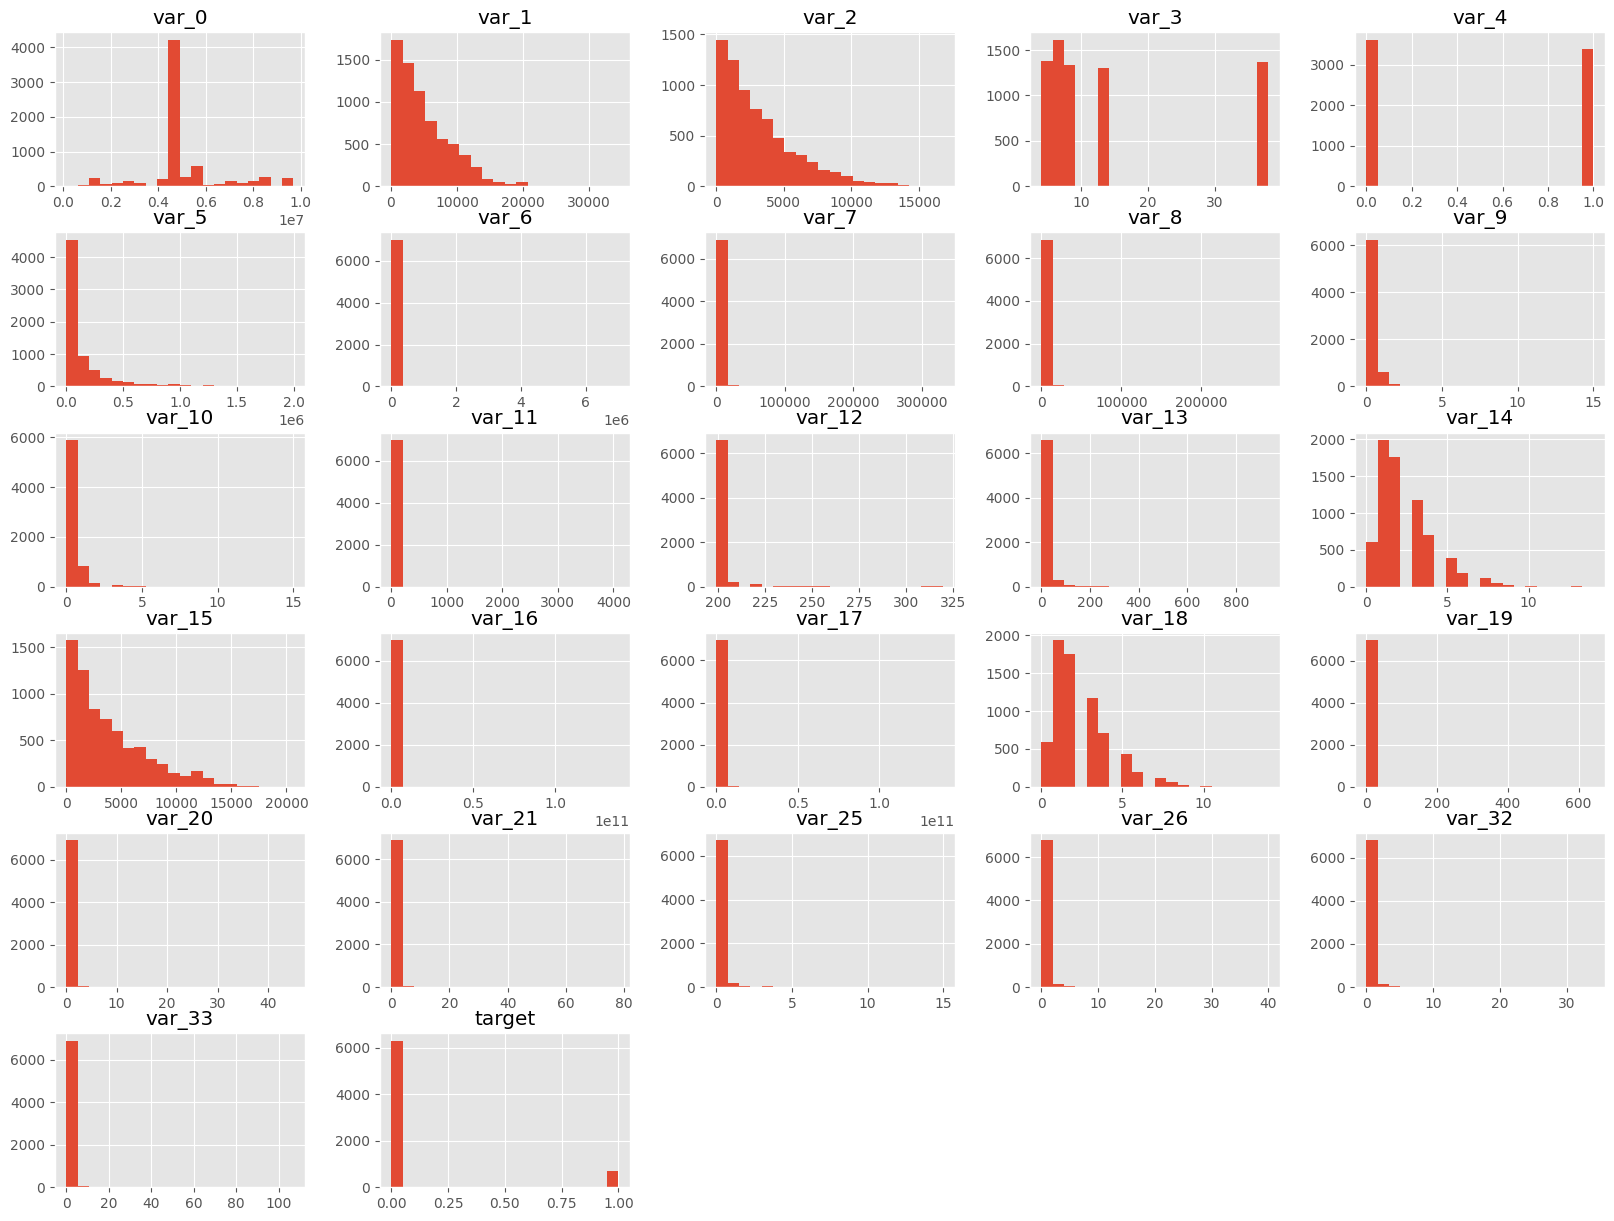

In [22]:
num_attributes.hist( bins=20, figsize=(20,15))

### 2.1.3. Verificando outliers nas features numéricas

In [23]:
train_data.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14',
       'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21',
       'var_25', 'var_26', 'var_32', 'var_33', 'target'],
      dtype='object')

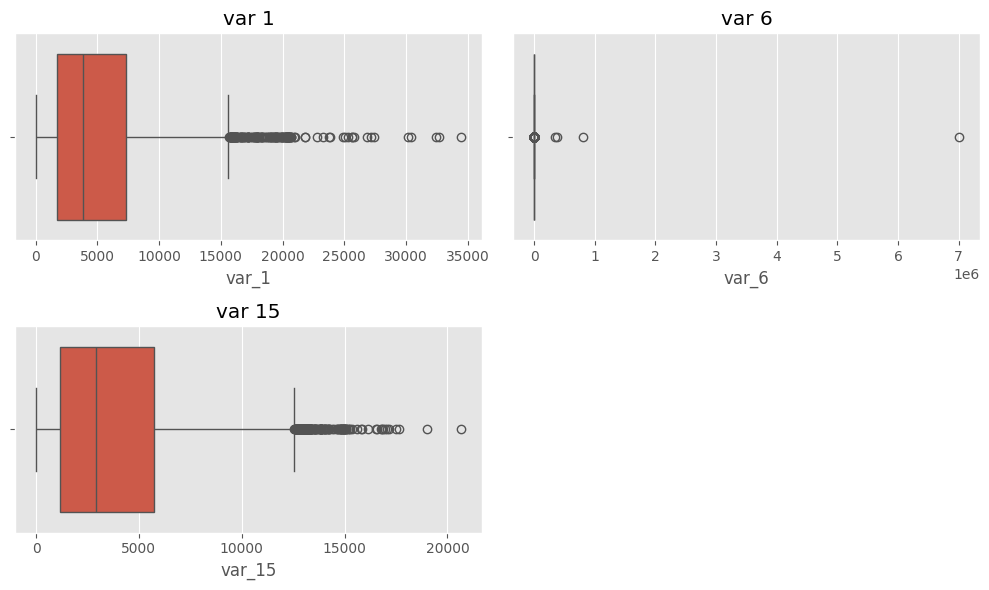

In [24]:
plt.figure(figsize=(10, 6))

# var 1
plt.subplot(2, 2, 1)
sns.boxplot(x=train_data['var_1'])
plt.title('var 1')

# var 2
plt.subplot(2, 2, 2)
sns.boxplot(x=train_data['var_6'])
plt.title('var 6')

# var 15
plt.subplot(2, 2, 3)
sns.boxplot(x=train_data['var_15'])
plt.title('var 15')

plt.tight_layout()

## 2.2 Análise Bivariada

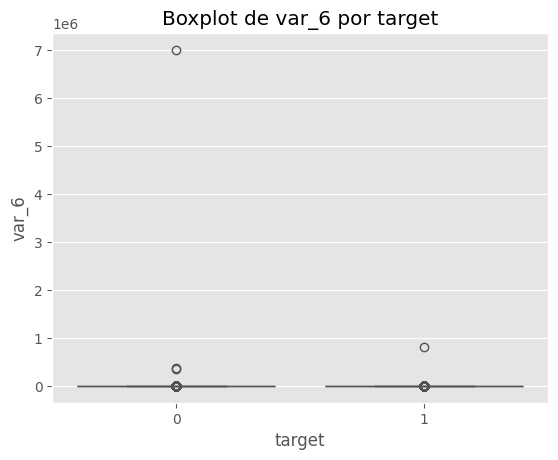

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizando a distribuição da feature numérica 'var_6' para cada classe da target
sns.boxplot(x='target', y='var_6', data=train_data)

plt.title('Boxplot de var_6 por target')
plt.show()

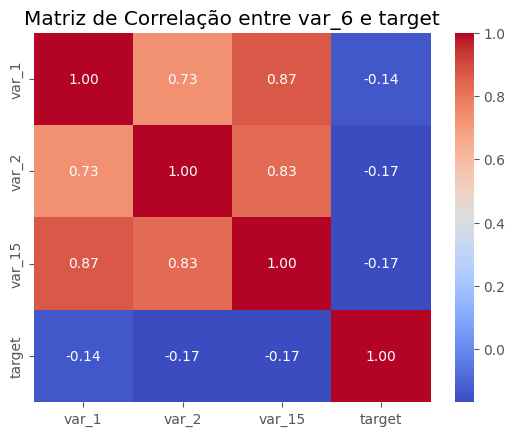

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize a matriz de correlação entre var_1, var_2, var_15 e target
sns.heatmap(train_data[['var_1', 'var_2', 'var_15', 'target']].corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Matriz de Correlação entre var_6 e target')
plt.show()

## 2.3. Análise Multivariada

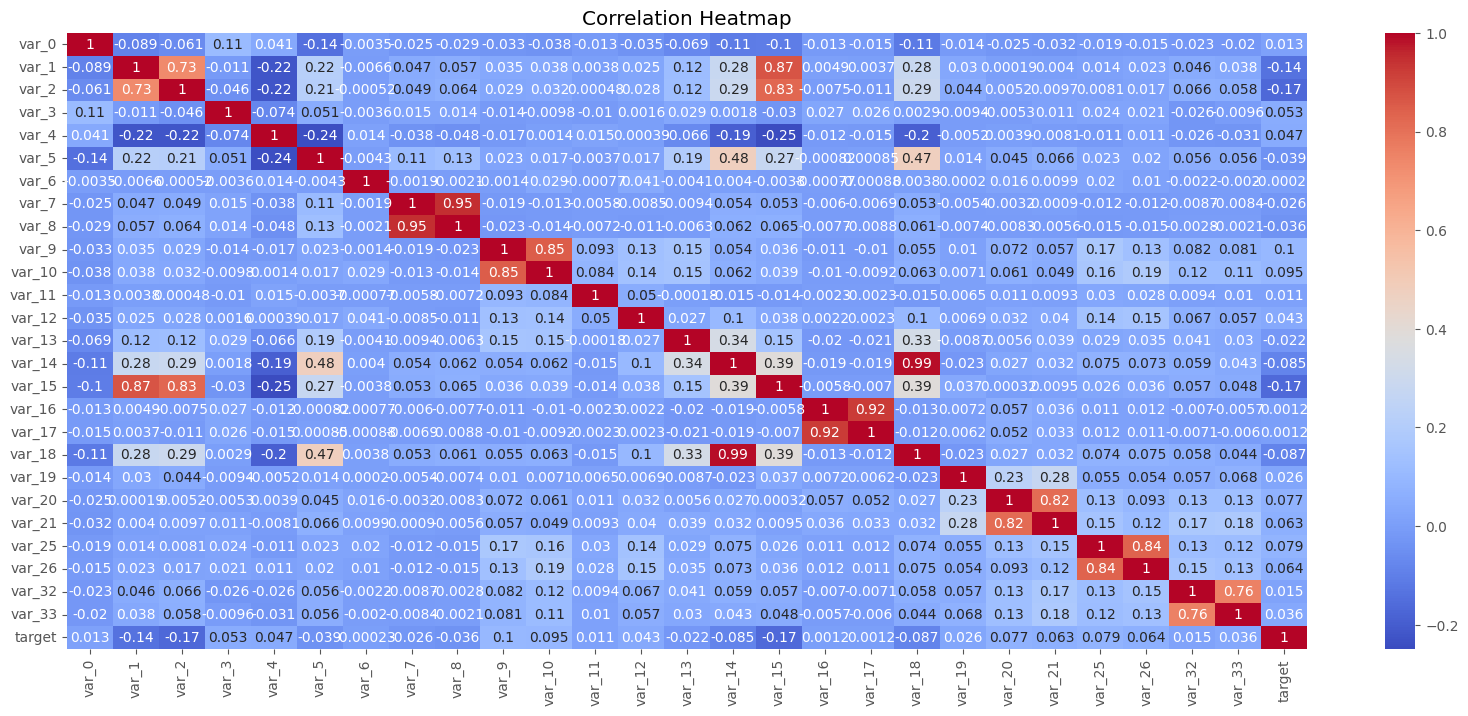

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = train_data.corr()
plt.figure(figsize=(20,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Correlação de Pearson ou Linear, mede a força e a direção ( positiva ou negativa) do relacionamento linear entre duas variáveis.

Não é muito indicada para variável de resposta binária, ela é mais útil para dados contínuos.

Funciona para relacionamentos lineares

# 3.0 Preparação dos Dados

In [28]:
train_data = train_data.copy()
test_data = test_data.copy()

In [29]:
print(train_data.shape)
print(test_data.shape)

(7000, 27)
(1750, 27)


## ~~3.1 Normalização~~


A normalização coloca os dados no intervalo entre 0 e 1 ou -1 e 1, 
caso haja valores negativos, sem distorcer as diferenças nas faixas de valores. Ou seja, ela não retira os outliers (valores extremos).

Não utilizei também porque ela é mais indicada para features com distribuição normal.

In [30]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

mms = MinMaxScaler() # Normalização

## 3.2 Rescaling

In [31]:
scaler = StandardScaler() # Padronização
rs = RobustScaler() # É mais robusto contra outliers porque pega o intervalo interquartilico Q3-Q1.

A padronização tem a mesma ideia da normalização, isto é, colocar os dados em uma mesma escala. Porém, na padronização, colocamos a média dos dados em 0 e o desvio padrão em 1. Esse algoritmo é melhor utilizado quando a nossa distribuição é Gaussiana.

A fórmula z-score é uma das mais comuns para padronização.

## 3.3 Transformação

**Grandeza**

Os algoritmos foram criados sob certas premissas, uma delas é que seus dados sejam normalmente distribuídos, por isso tentamos transformar a grandeza da distribuição da variável resposta em uma normal.

Nesse passo, estou tentando diminuir a assimetria e curtore utilizando 2 métodos.

**Transformação Logarítmica:** Útil para dados com alta assimetria positiva.

**Transformação de Raiz Cúbica:** Pode ajudar a reduzir a curtose.

In [32]:
print(train_data.dtypes)
print(test_data.dtypes)

var_0       int64
var_1       int64
var_2       int64
var_3       int64
var_4       int64
var_5     float64
var_6     float64
var_7     float64
var_8     float64
var_9       int64
var_10      int64
var_11      int64
var_12      int64
var_13      int64
var_14      int64
var_15      int64
var_16    float64
var_17    float64
var_18      int64
var_19      int64
var_20      int64
var_21      int64
var_25      int64
var_26      int64
var_32      int64
var_33      int64
target      int64
dtype: object
var_0       int64
var_1       int64
var_2       int64
var_3       int64
var_4       int64
var_5     float64
var_6     float64
var_7     float64
var_8     float64
var_9       int64
var_10      int64
var_11      int64
var_12      int64
var_13      int64
var_14      int64
var_15      int64
var_16    float64
var_17    float64
var_18      int64
var_19      int64
var_20      int64
var_21      int64
var_25      int64
var_26      int64
var_32      int64
var_33      int64
target      int64
dtype: object


In [33]:
train_data.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14',
       'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21',
       'var_25', 'var_26', 'var_32', 'var_33', 'target'],
      dtype='object')

In [34]:
vars_to_transform_log = ['var_3', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14',
       'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21',
       'var_25', 'var_26', 'var_32', 'var_33']

vars_to_treat_outliers = ['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14',
       'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21',
       'var_25', 'var_26', 'var_32', 'var_33']

Removi as variáveis 0, 1, 2 porque elas já tem uma assimetria mais próxima da normal.

Removi 4 por ser feature binária

### Funções

In [35]:
def treat_outliers(data, column, lower_percentile=1, upper_percentile=95):
    lower = np.percentile(data[column], lower_percentile)
    upper = np.percentile(data[column], upper_percentile)
    data[column] = np.clip(data[column], lower, upper)
    
    return data

In [1]:
import numpy as np

# Dados de exemplo
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Calcular o 25º percentil
percentil_25 = np.percentile(data, 25)
print(percentil_25)  # Saída: 3.25


3.25


In [36]:
# Função para transformarmos para o log na base 10
def log10_transform(x):
    return np.log10(x - x.min() + 1)  # Adicionamos 1 para evitar log(0)

###  Tratar outliers

In [37]:
# Aplicar o tratamento de outliers para cada variável
for var in vars_to_treat_outliers:
    if train_data[var].dtype in ['int64', 'float64']:
        # Atualizar ambos os DataFrames com a coluna tratada
        train_data = treat_outliers(train_data, var)
        test_data = treat_outliers(test_data, var)

### Transformação Logarítmica (Base 10)

In [38]:
# Aplicar transformação logarítmica (base 10) às colunas tratadas
for var in vars_to_transform_log:
    if train_data[var].dtype in ['int64', 'float64']:
        # Aplicar transformação logarítmica
        train_data[var] = log10_transform(train_data[var])
        test_data[var] = log10_transform(test_data[var])


In [39]:
# print(train_data.columns)
# print(test_data.columns)

In [40]:
# features = train_data.columns
# train_data[features].hist(bins=20, figsize=(20, 15))

In [41]:
num_attributes = train_data.select_dtypes( include=['int64', 'float64'])

In [42]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max )  ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
metrics = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
metrics.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
metrics


,attributes,min,max,range,mean,median,std,skew,kurtosis
0,var_0,1091101.0,8.630504e+06,7.539403e+06,4.986206e+06,4.761003e+06,1.564125e+06,0.380393,1.511464
1,var_1,201.0,1.292325e+04,1.272225e+04,4.874150e+03,3.872000e+03,3.721702e+03,0.739313,-0.561951
2,var_2,7.0,8.925200e+03,8.918200e+03,3.045450e+03,2.372000e+03,2.513670e+03,0.871678,-0.190440
3,var_3,0.0,1.531479e+00,1.531479e+00,7.914303e-01,6.989700e-01,4.663782e-01,0.206650,-0.842083
4,var_4,0.0,1.000000e+00,1.000000e+00,4.835714e-01,0.000000e+00,4.997300e-01,0.065764,-1.996246
5,var_5,0.0,5.891249e+00,5.891249e+00,4.635091e+00,4.726255e+00,8.604674e-01,-1.665874,6.836606
6,var_6,0.0,1.641682e+00,1.641682e+00,3.169185e-01,0.000000e+00,5.912258e-01,1.441382,0.254799
7,var_7,0.0,3.695048e+00,3.695048e+00,1.601074e+00,1.822070e+00,1.132175e+00,-0.084702,-0.952981
8,var_8,0.0,3.742920e+00,3.742920e+00,1.700776e+00,1.875842e+00,1.103527e+00,-0.142373,-0.756396
9,var_9,0.0,3.010300e-01,3.010300e-01,3.328532e-02,0.000000e+00,9.440321e-02,2.484128,4.172082


array([[<Axes: title={'center': 'var_0'}>,
        <Axes: title={'center': 'var_1'}>,
        <Axes: title={'center': 'var_2'}>,
        <Axes: title={'center': 'var_3'}>,
        <Axes: title={'center': 'var_4'}>],
       [<Axes: title={'center': 'var_5'}>,
        <Axes: title={'center': 'var_6'}>,
        <Axes: title={'center': 'var_7'}>,
        <Axes: title={'center': 'var_8'}>,
        <Axes: title={'center': 'var_9'}>],
       [<Axes: title={'center': 'var_10'}>,
        <Axes: title={'center': 'var_11'}>,
        <Axes: title={'center': 'var_12'}>,
        <Axes: title={'center': 'var_13'}>,
        <Axes: title={'center': 'var_14'}>],
       [<Axes: title={'center': 'var_15'}>,
        <Axes: title={'center': 'var_16'}>,
        <Axes: title={'center': 'var_17'}>,
        <Axes: title={'center': 'var_18'}>,
        <Axes: title={'center': 'var_19'}>],
       [<Axes: title={'center': 'var_20'}>,
        <Axes: title={'center': 'var_21'}>,
        <Axes: title={'center': 'var_2

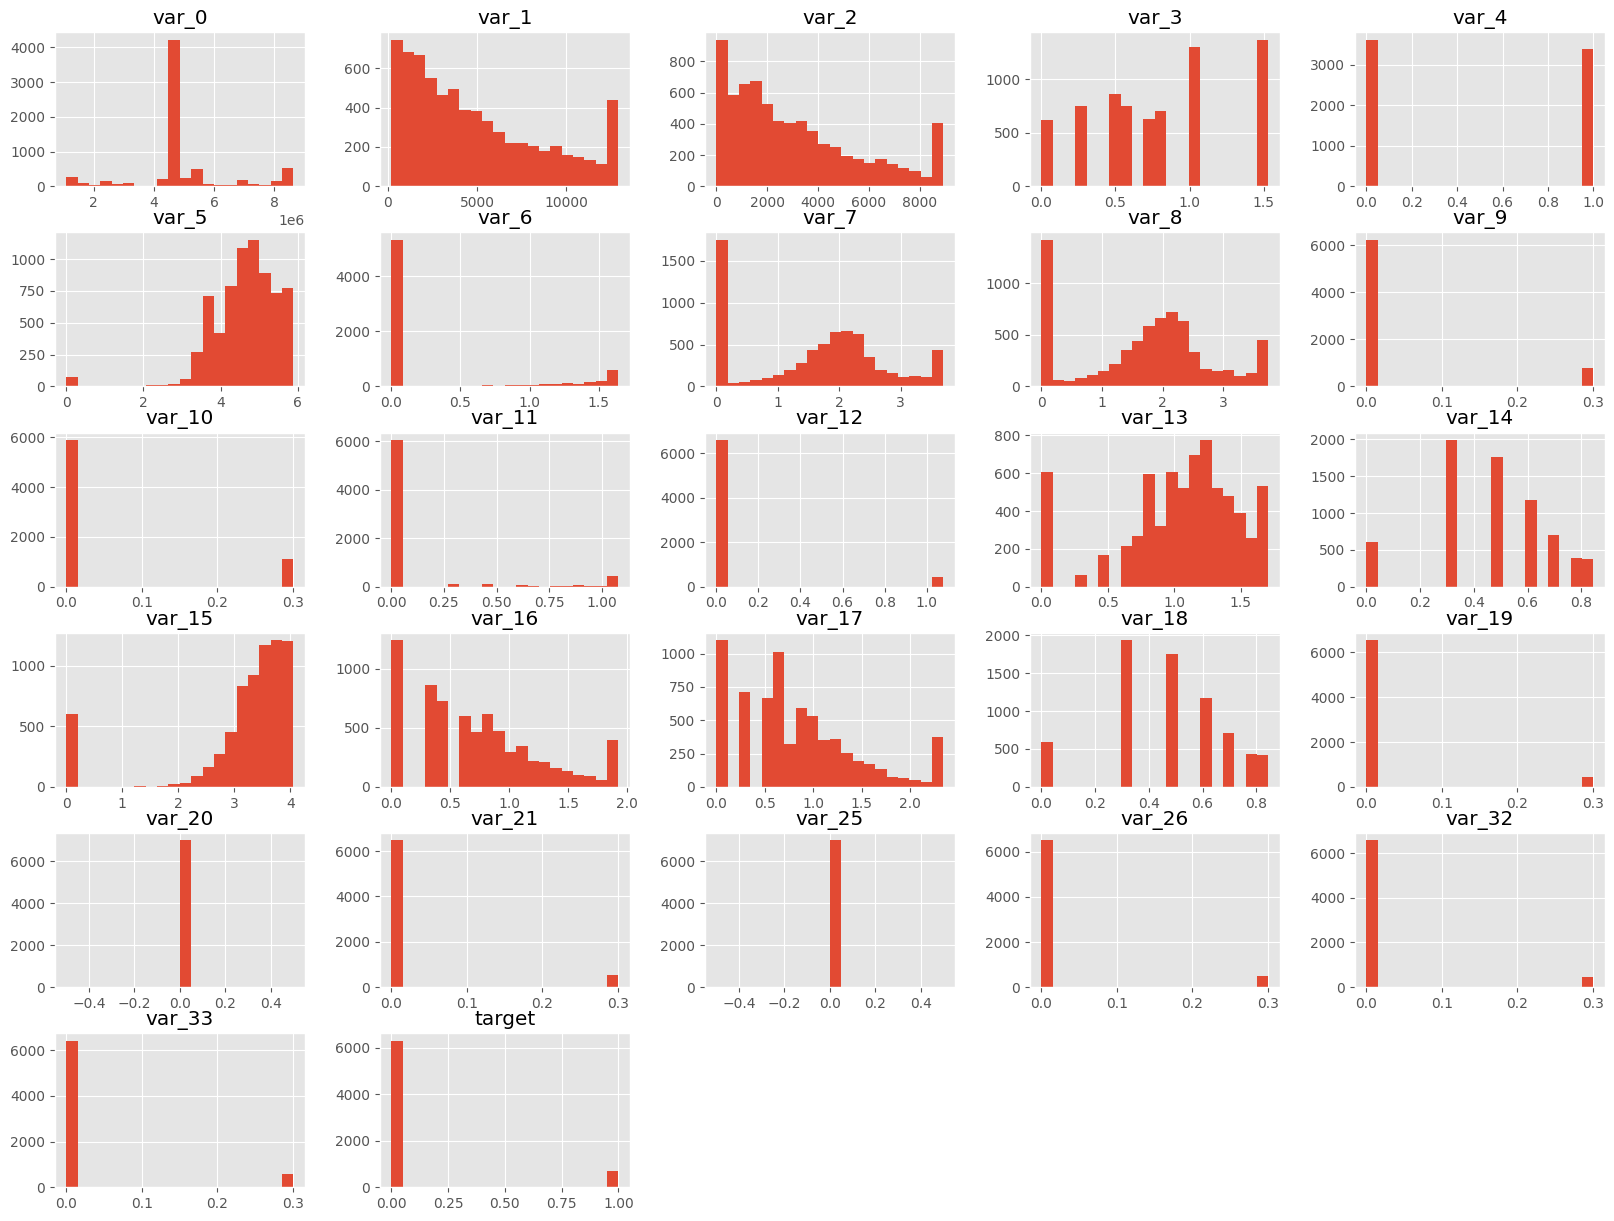

In [43]:
features = train_data.columns
train_data[features].hist(bins=20, figsize=(20, 15))

### Verificando valores nas features novamente após tratamento de outliers

In [44]:
# Lista de variáveis com muitos valores 0
variables = train_data.columns

# Calculando a porcentagem de zeros
percentage_zeros = train_data[variables].apply(lambda x: (x == 0).mean() * 100)

# Criando o DataFrame
percentage_zeros_df = percentage_zeros.reset_index()
percentage_zeros_df.columns = ['features', 'porcentagem_zeros']

percentage_zeros_df.sort_values('porcentagem_zeros', ascending=False)

,features,porcentagem_zeros
22,var_25,100.000000
20,var_20,100.000000
12,var_12,94.028571
24,var_32,93.814286
19,var_19,93.485714
23,var_26,92.885714
21,var_21,92.414286
25,var_33,91.614286
26,target,90.000000
9,var_9,88.942857


### Rescaling ( Rescala para o intervalo entre 0 e 1, dist nao gaussianas )

Razão para Escalonar Após Transformação Logarítmica
Reduzir a Variabilidade:

A transformação logarítmica pode reduzir a variabilidade dos dados, especialmente se os dados originais tiverem uma ampla gama de valores ou forem altamente assimétricos. No entanto, a escala dos dados ainda pode variar significativamente após a transformação.
Normalização dos Dados:

Mesmo após a transformação logarítmica, os dados podem ter diferentes magnitudes. O escalonamento, como a padronização (normalização) dos dados, ajuda a trazer todas as variáveis para uma escala semelhante, o que é importante para muitos algoritmos de aprendizado de máquina.
Melhor Desempenho de Algoritmos:

Muitos algoritmos de aprendizado de máquina (por exemplo, regressão logística, máquinas de vetores de suporte, redes neurais) funcionam melhor quando os dados são escalonados ou padronizados. Isso é porque esses algoritmos frequentemente assumem que todas as variáveis têm uma escala semelhante e são normalmente distribuídas.

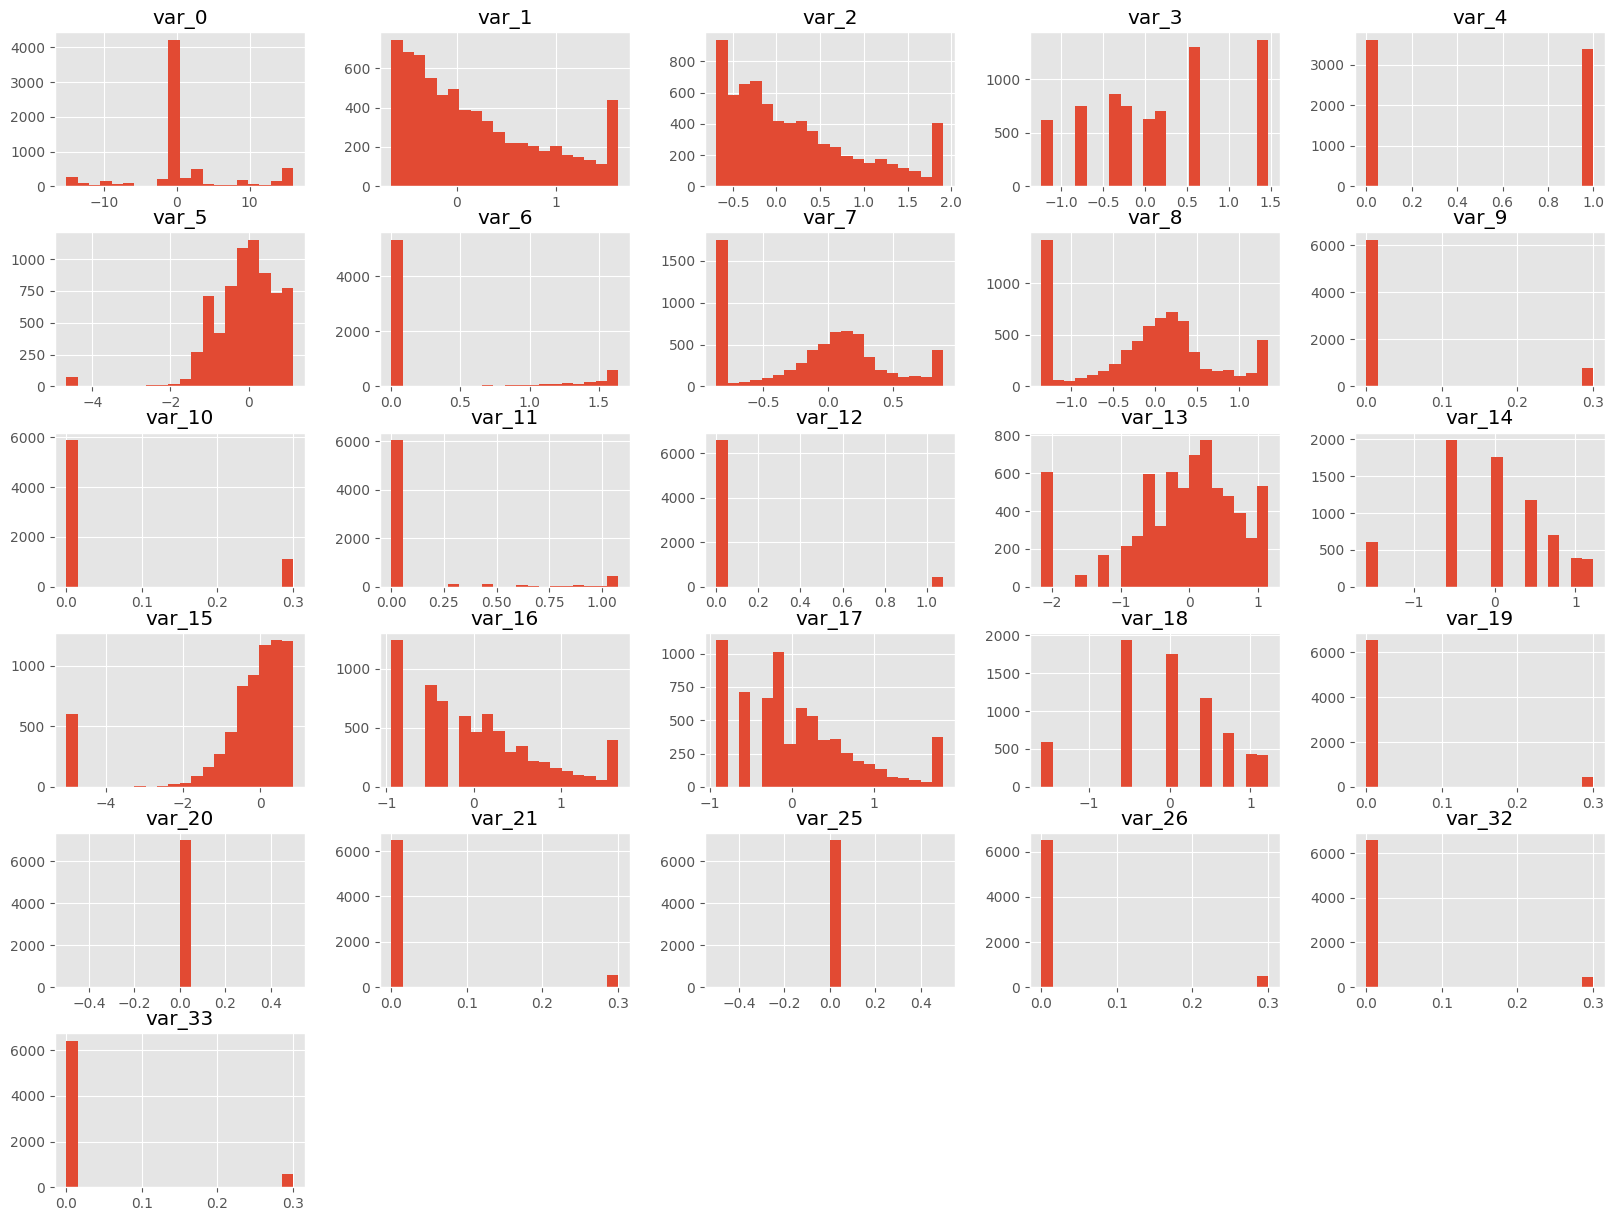

In [45]:
features = [col for col in train_data.columns if col != 'target']

train_data[features] = rs.fit_transform(train_data[features])
test_data[features] = rs.transform(test_data[features])

train_data[features].hist(bins=20, figsize=(20, 15))
plt.show()

In [46]:
print(train_data['target'].value_counts(normalize=True))

target
0    0.9
1    0.1
Name: proportion, dtype: float64


### Features de natureza categórica segundo o dicionário ( 'var_0', 'var_3', 'var_4', 'var_12' )

In [47]:
# Tratar variáveis numéricas com natureza categórica
categorical_vars = ['var_0', 'var_3', 'var_4', 'var_12']

# 4.0 Feature Selection

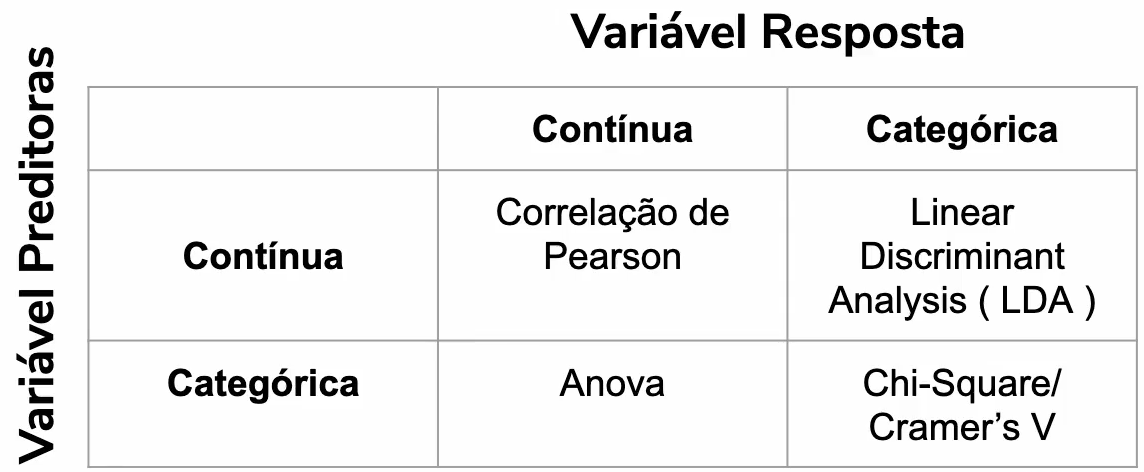

In [48]:
from IPython.display import Image
Image('../img/selecao_univariada.png')

## 4.1 Seleção univariada
**Vantagem:** 
1. Método Simples

2. Método Rápido

3. Fácil Entendimento
**Desvantagem:** Não considera a influência entre as variáveis

### Removendo features 25 e 20

In [49]:
train_data.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14',
       'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21',
       'var_25', 'var_26', 'var_32', 'var_33', 'target'],
      dtype='object')

In [50]:
train_data = train_data.drop(columns=['var_25', 'var_20'])
test_data = test_data.drop(columns=['var_25', 'var_20'])

In [51]:
# train_data = train_data.drop(columns=categorical_vars)
# test_data = test_data.drop(columns=categorical_vars)

### 4.1.2 Teste F ANOVA ( analysis of variance )

Utilizando o teste ANOVA F-value para avaliar a relação entre cada característica e a variável dependente.
Depois Seleciono as 171 características com os maiores valores F (ou seja, as que têm a relação mais forte com o alvo).
Aplico essa seleção tanto aos dados de treinamento quanto aos de teste.

In [52]:
from sklearn.feature_selection import f_classif, SelectPercentile

# Definir o nome da variável alvo
TARGET_NAME = 'target'

In [53]:
# Selecionar features numéricas
features = train_data.select_dtypes(include=[np.number]).columns.tolist()
features.remove(TARGET_NAME)

In [54]:
# Selecionar features numéricas
numeric_features = train_data.select_dtypes(include=[np.number]).columns.tolist()
features = [f for f in numeric_features if f != TARGET_NAME]

In [55]:
# Realizar o teste F ANOVA
X = train_data[features]
y = train_data[TARGET_NAME]
f_stat, p_values = f_classif(X, y)

In [56]:
# Criar e exibir DataFrame com resultados
results = pd.DataFrame({'Feature': features, 'F statistic': f_stat, 'p_value': p_values})
results = results.sort_values('p_value')
results

,Feature,F statistic,p_value
15,var_15,398.114671,3.411449e-86
2,var_2,219.935769,5.154909e-49
8,var_8,186.621009,5.977958e-42
7,var_7,165.997183,1.477169e-37
1,var_1,160.659078,2.037041e-36
18,var_18,127.291584,2.867214e-29
14,var_14,126.482951,4.278223e-29
13,var_13,93.609768,5.275701e-22
11,var_11,64.986372,8.802130e-16
5,var_5,56.240051,7.205691e-14


# 5.0. MACHINE LEARNING MODELLING

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import RobustScaler

## Pré Processamento

In [58]:
# Converter colunas para float
# colunas_para_converter = ['var_5', 'var_6', 'var_7', 'var_8', 'var_16', 'var_17']
# for col in colunas_para_converter:
#    train_data[col] = train_data[col].map(lambda x: float(x.replace(',', '.')))
#    test_data[col] = test_data[col].map(lambda x: float(x.replace(',', '.')))

# Remover variáveis não desejadas (tirar var_26 diminui a perfomance)
#variaveis_para_remover = ['index', 'var_27', 'var_28', 'var_29', 'var_30', 'var_23', 'var_22', 'var_31', 'var_24', 'var_25', 'var_20', 'var_32', 'var_19', 'var_21', 'var_9']
#train_data = train_data.drop(columns=variaveis_para_remover)
#test_data  = test_data.drop(columns=variaveis_para_remover)

Aplicando transformação logarítmica para var_6 e var_11 porque elas possuem uma alta assimetria e curtose positivas, a Performance piorou.

As features na variável 'colunas_para_converter' estavam como object devido aos valores com vírgula, por isso troquei a vírgula por ponto e transformei em colunas numéricas.

As variáveis removidas em sua maioria tem acima de 95% de valores 0 como mostrei na descrição dos dados, o que não ajuda no modelo. Eu removi de uma a uma e fui analisando as métricas roc_auc_score e Kolmogorov-Smirnov (KS) statistic. Essa combinação foi a que troxe as maiores métricas.

In [59]:
train_data.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14',
       'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_21', 'var_26',
       'var_32', 'var_33', 'target'],
      dtype='object')

## Transformação polinomial

In [60]:
# Seleciona todas as colunas exceto a última
features_poly = train_data.columns[:-1]


In [61]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
train_poly = poly.fit_transform(train_data[features_poly])
test_poly = poly.transform(test_data[features_poly])

## Escalonamento

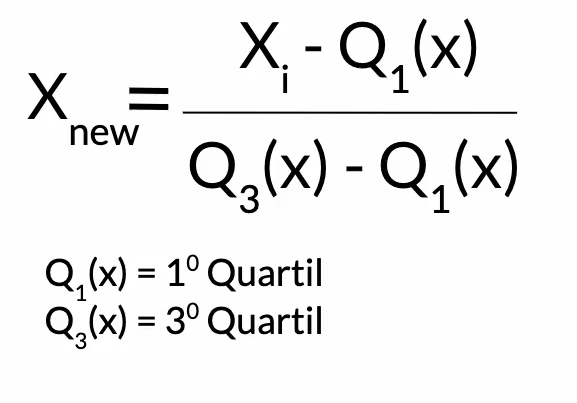

In [62]:
Image('../img/robust_scaler.png')


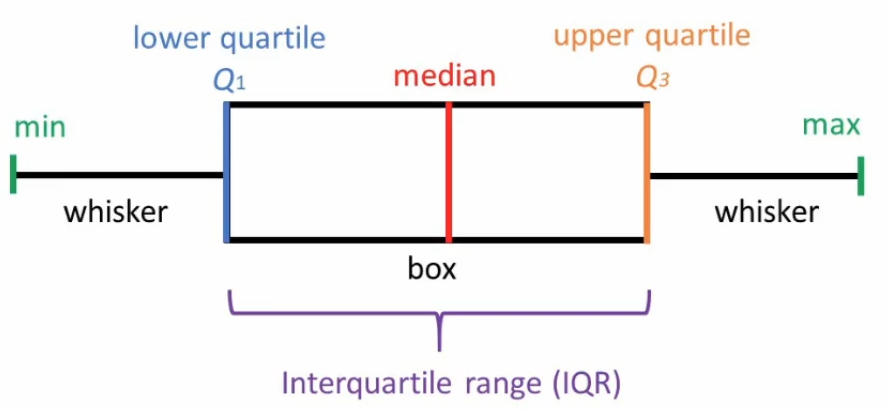

In [63]:
Image('../img/boxplot.png')

In [64]:
rs = RobustScaler()

X_train_poly = rs.fit_transform(train_poly)
X_test_poly = rs.transform(test_poly)

In [65]:
print(X_train_poly.shape)
print(X_test_poly.shape)

(7000, 300)
(1750, 300)


## Separando features e target

In [66]:
y_train = train_data['target']
y_test = test_data['target']

In [67]:
print( y_train.shape)
print( y_test.shape)

(7000,)
(1750,)


## Balanceando as classes

In [68]:
from imblearn.under_sampling import RandomUnderSampler

# Aplicando undersampling
rus = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train_poly, y_train)


**Subamostragem (undersampling)** da classe majoritária: eliminar
aleatoriamente amostras da classe majoritária até as frações das classes
serem iguais, ou no mínimo menos desbalanceadas.

Sobreamostragem (oversampling) da classe minoritária: adicionar
aleatoriamente amostras duplicadas da classe minoritária para atingir o
mesmo objetivo.

**Ponderação de amostras (weighting samples):** Esse método é executado
como parte da etapa de treinamento, para que a classe minoritária
receba coletivamente a mesma “ênfase” da classe majoritária no modelo
ajustado. O efeito é semelhante ao do oversampling.




In [69]:
print("Distribuição das classes antes do balanceamento:")
print(y_train.value_counts(normalize=True))
print("\nDistribuição das classes após o balanceamento:")
print(pd.Series(y_train_balanced).value_counts(normalize=True))

Distribuição das classes antes do balanceamento:
target
0    0.9
1    0.1
Name: proportion, dtype: float64

Distribuição das classes após o balanceamento:
target
0    0.5
1    0.5
Name: proportion, dtype: float64


In [70]:
print(np.mean(y_train_balanced))
print(np.mean(y_test))

0.5
0.1


## TESTE F ANOVA

In [76]:
# TESTE F ANOVA
from sklearn.feature_selection import SelectKBest, f_classif

# Aplicando seleção de features usando ANOVA F-value
selector = SelectKBest(f_classif, k=300)
X_train_selected = selector.fit_transform(X_train_balanced, y_train_balanced)
X_test_selected = selector.transform(X_test_poly)


## Modelo

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from scipy.stats import ks_2samp
import numpy as np

modelo = LogisticRegression(C=0.1, solver='liblinear', penalty='l1', class_weight='balanced', max_iter=1000, random_state=42 )

# validação cruzada 
scores = cross_val_score(modelo, X_train_selected, y_train_balanced, cv=4, scoring='roc_auc')

# train
modelo.fit(X_train_selected , y_train_balanced)

# performance
y_pred_proba = modelo.predict_proba(X_test_selected )[:, 1] # Probabilidade da classe positiva

#  roc_auc
roc_auc = roc_auc_score(y_test, y_pred_proba)

# estatística KS
ks_stat, ks_p_value = ks_2samp(y_pred_proba[y_test == 1], y_pred_proba[y_test == 0])

print(f"ROC AUC Score: {roc_auc}")


print(f"Média do ROC AUC Score (Validação Cruzada): {np.mean(scores)}")
print(f"Desvio padrão do ROC AUC Score (Validação Cruzada): {np.std(scores)}")

print(f"Estatística KS: {ks_stat}")
print(f"P-valor da Estatística KS: {ks_p_value}")

ROC AUC Score: 0.7602866213151928
Média do ROC AUC Score (Validação Cruzada): 0.7547346938775512
Desvio padrão do ROC AUC Score (Validação Cruzada): 0.018526927620728755
Estatística KS: 0.42603174603174604
P-valor da Estatística KS: 2.5455027972569065e-26


In [78]:
# Top features selecionadas
feature_names = poly.get_feature_names_out(features_poly)
top_features = pd.DataFrame({
    'Feature': feature_names,
    'Score': selector.scores_
}).sort_values('Score', ascending=False).head(10)

print("\nTop 10 features:")
top_features


Top 10 features:


,Feature,Score
15,var_15,159.286680
2,var_2,143.648168
7,var_7,119.672139
8,var_8,116.336126
186,var_8 var_15,101.003428
258,var_14 var_18,98.635020
171,var_7 var_15,97.712508
184,var_8 var_13,97.697031
246,var_13 var_15,95.373605
255,var_14 var_15,94.857440


Os scores exibidos indicam a importância relativa de cada feature para o modelo. Quanto maior o score, mais relevante é a feature para a predição da variável-alvo (inadimplência).

## Métricas

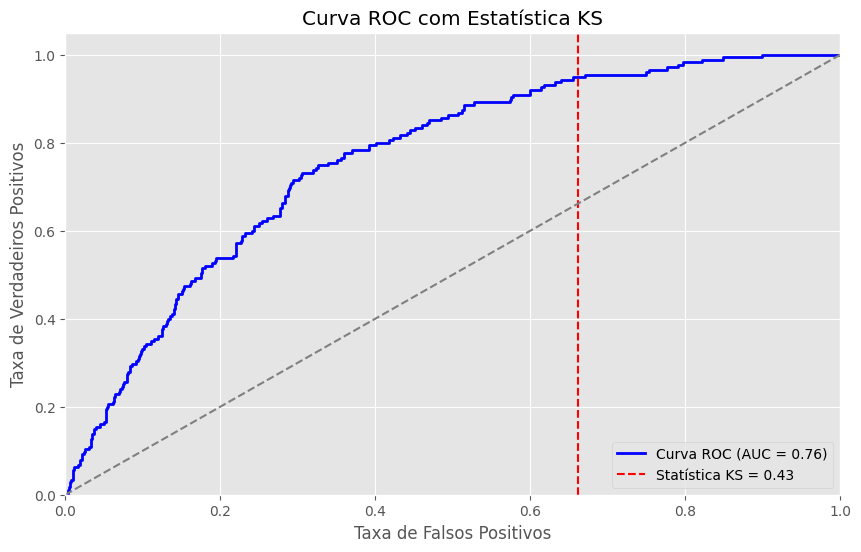

Área sob a Curva ROC (AUC): 0.76
Estatística KS: 0.43
P-valor da Estatística KS: 0.00


In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import ks_2samp
import numpy as np

# y_pred_proba: probabilidades previstas da classe positiva

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

#  Estatística KS
ks_stat, ks_p_value = ks_2samp(y_pred_proba[y_test == 1], y_pred_proba[y_test == 0])

# Plotando a Curva ROC e a Estatística KS 
plt.figure(figsize=(10, 6))

# Plota a Curva ROC
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')

# Adicionar linha para a Estatística KS
ks_threshold = np.percentile(y_pred_proba[y_test == 1], 100 * (1 - ks_stat))
plt.axvline(x=ks_threshold, color='red', linestyle='--', label=f'Statística KS = {ks_stat:.2f}')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC com Estatística KS')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

print(f"Área sob a Curva ROC (AUC): {roc_auc:.2f}")
print(f"Estatística KS: {ks_stat:.2f}")
print(f"P-valor da Estatística KS: {ks_p_value:.2f}")

# Hyperparameter Fine Tunning


In [80]:
#from sklearn.model_selection import GridSearchCV

#param_grid = {
#    'C': [0.01, 0.1, 1, 10],  
#    'penalty': ['l2'],       
#    'solver': ['liblinear'],  
#    'max_iter': [100, 200]    
#}


#modelo = LogisticRegression(class_weight='balanced', random_state=42)

# Configurar o Grid Search
#grid_search = GridSearchCV(estimator=modelo,
#                          param_grid=param_grid,
#                          scoring='roc_auc',
#                           cv=3,        
#                           n_jobs=-1,  
#                          verbose=1,   
#                          return_train_score=True) 


#grid_search.fit(X_train_poly, y_train)

#print("Melhores parâmetros encontrados:")
#print(grid_search.best_params_)


#melhor_modelo = grid_search.best_estimator_

# Fazer predições com o melhor modeloy_pred_proba = melhor_modelo.predict_proba(X_test_poly)[:, 1]


#roc_auc = roc_auc_score(y_test, y_pred_proba)
#print(f"Melhor ROC AUC Score: {roc_auc:.2f}")


# Próximos Passos


### QUESTÃO 3: IMPLEMENTAÇÃO E ACOMPANHAMENTO DO MODELO

1. Calcule o índice de estabilidade populacional (IEP/PSI), considerando os novos clientes da instituição
financeira. A população de clientes que tomou crédito no mês seguinte é estável em relação à população
utilizada para o treino do modelo? Por quê? O IEP é o único método possível para verificarmos a qualidade
de um modelo em operação?

2. Quais medidas devem ser tomadas no caso da desestabilização de um modelo?